# **ASSIGNMENT 2 - EMPIRICAL STUDY OF CLASSIFICATION PROBLEM**

# 1. Group Description
Group Number: 119 <br>
Names: Natasha Hussain | Daanish Khan <br>
Student Numbers: 300122562 | 300126840 <br>

# 2. The Classification Problem
The classification problem are problems where an object or datapoint needs to be sorted (or classified) into one of n classes based on its similarity to other objects. For example, sorting fruits based on their species can be considered a classification problem. In this case, we will be using two models (Logistic Regression & Naive Bayes) to predict the quality of wine based on it's attributes.

# 3. The Dataset
In this assignment, we used WineQT.csv from : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
This dataset of wine samples has :
Number of samples: 4898, Number of attributes: 11, Number of classes: 11 (0 to 10)


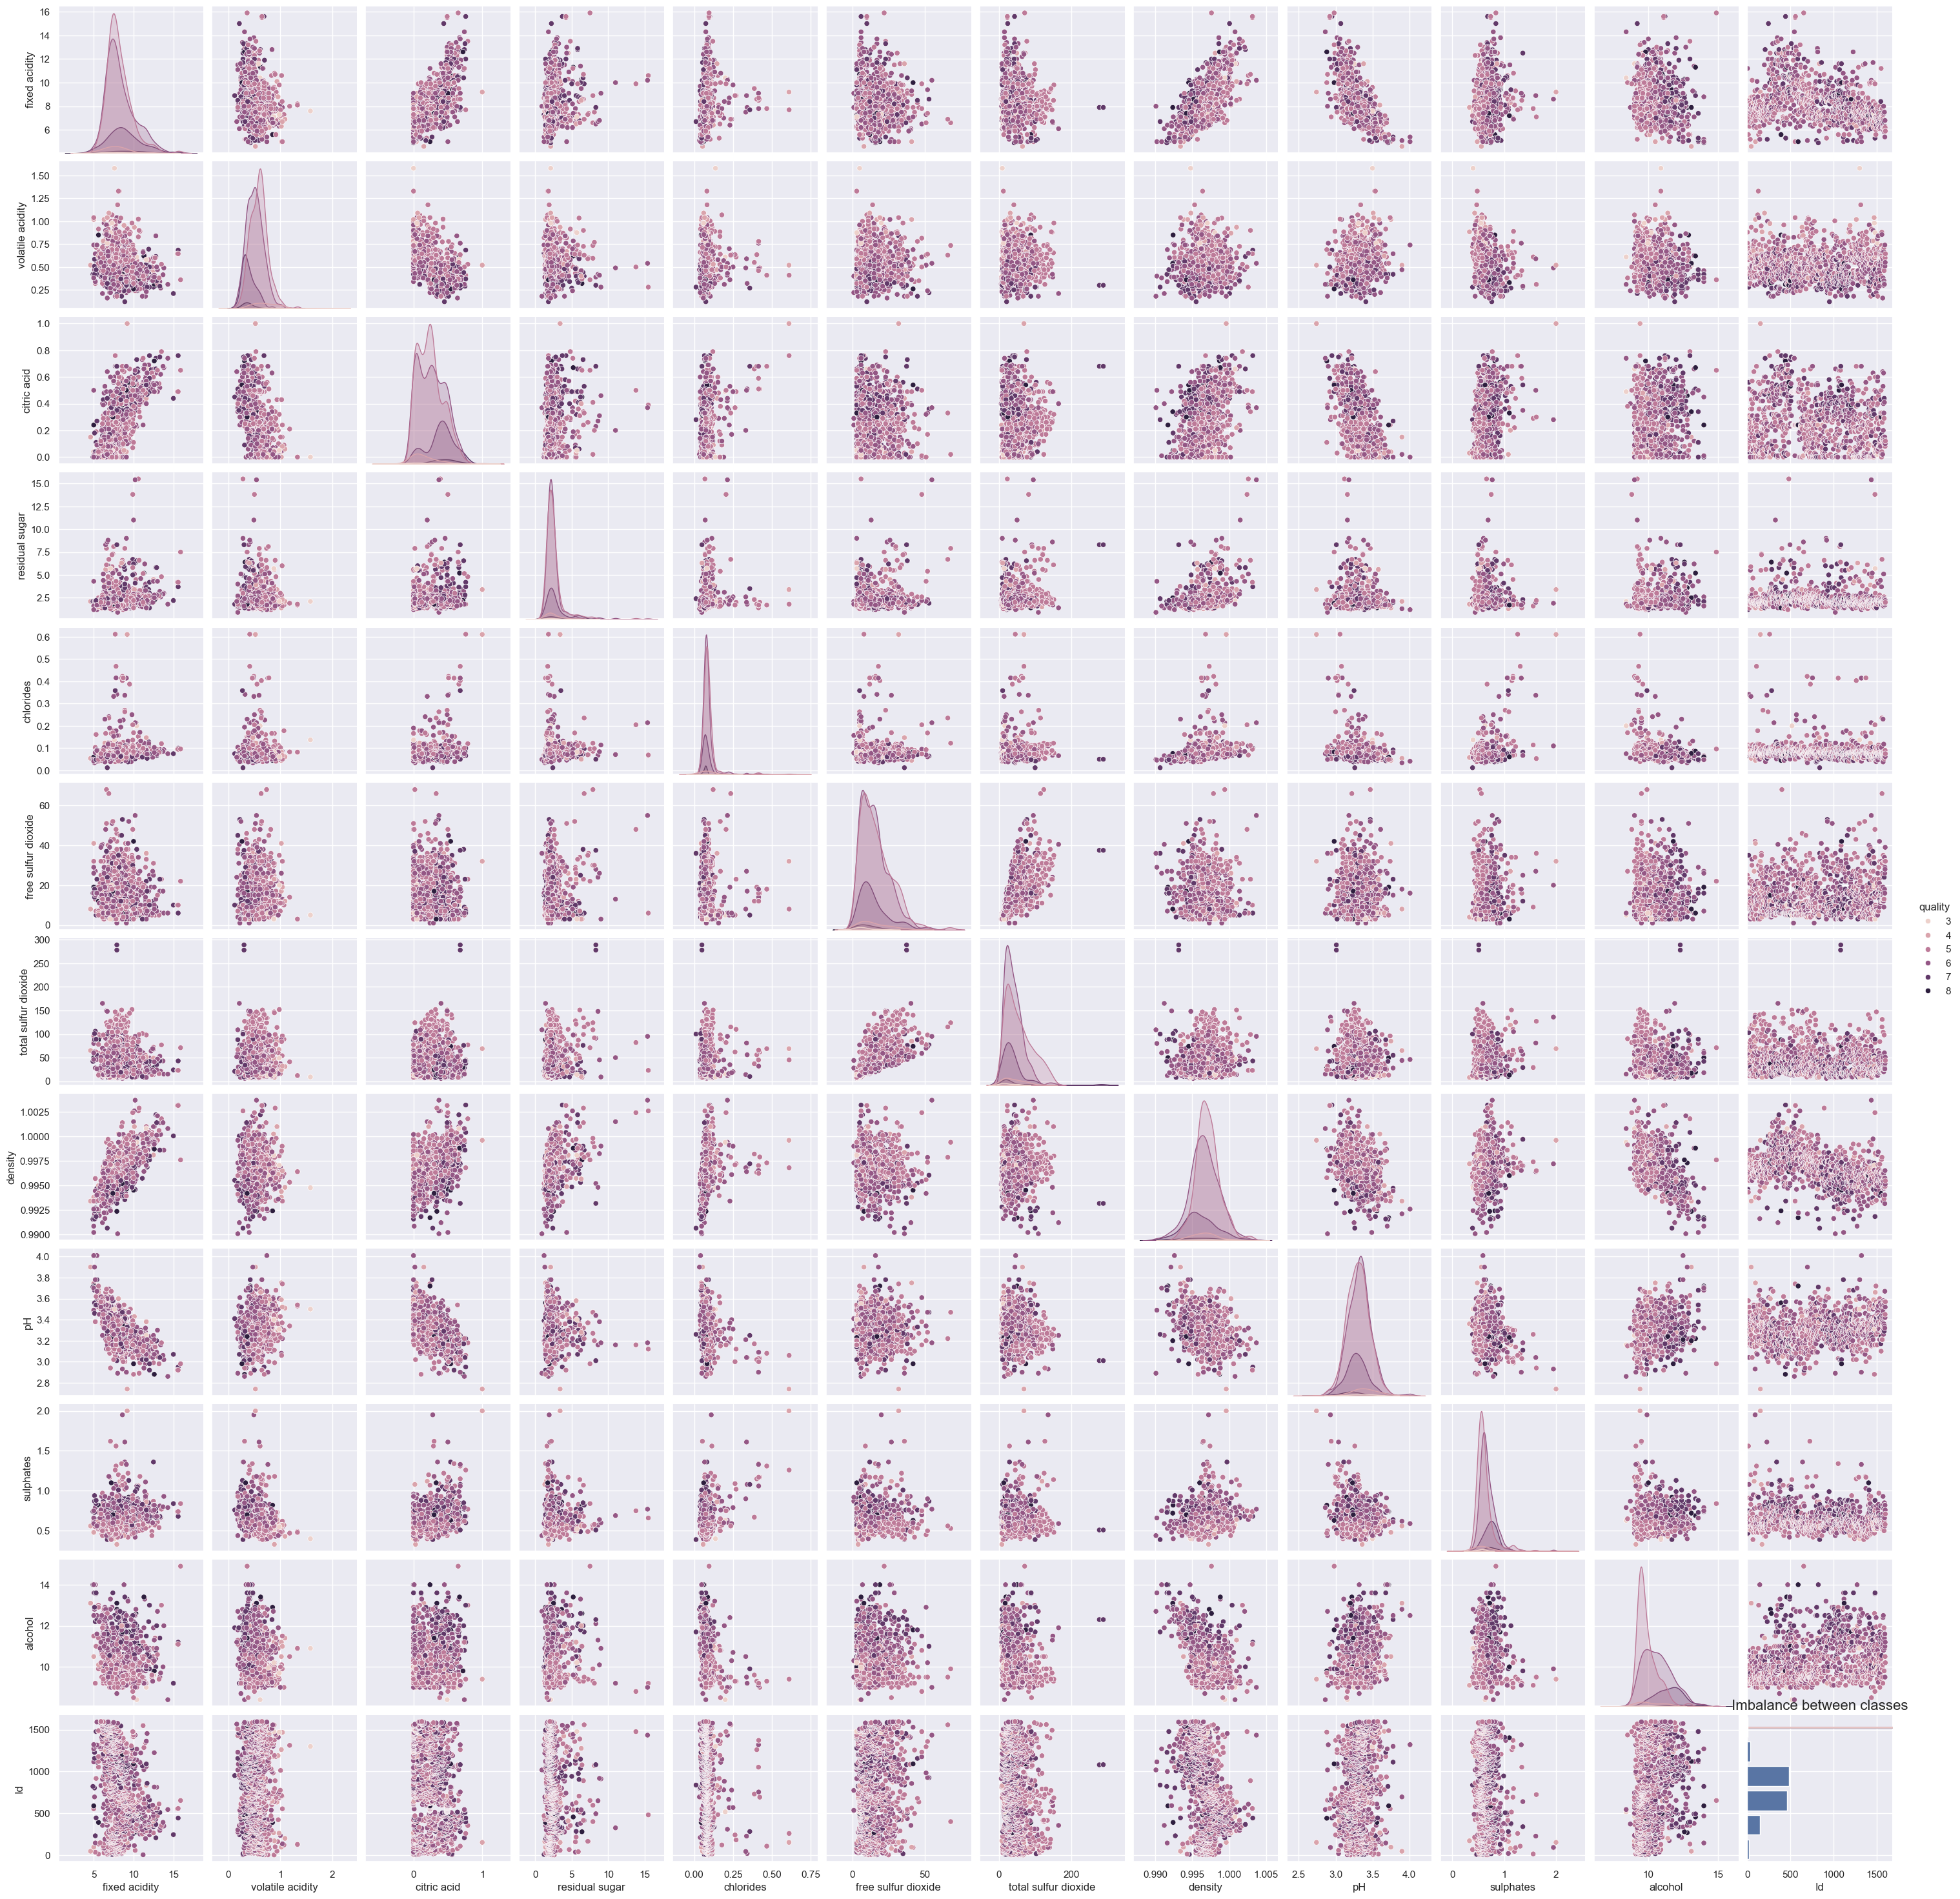

In [29]:
# Importing libraries we will use throughout the assignment
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    precision_score, 
    recall_score
)

#importing the wine quality dataset
url = 'https://raw.githubusercontent.com/NatashaNaima/AI-NaiveBayes/main/WineQT.csv'
dataset = pd.read_csv(url)
dataset.drop('Id', axis=1)
dataset.columns
# a small set to reduce literal runtime while testing
small_set = dataset.head(10)

sns.pairplot(dataset, diag_kind = 'kde', hue = 'quality')

# Creating a plotting function to evaluate our samples taken from [2]
# Set plotting size and style
sns.set(rc = {'figure.figsize':(15, 8)})
sns.set_style("darkgrid")

# setting y, our dependent variable, to quality. And our independent variables to X.
X = dataset.drop(['quality', 'Id'], axis=1)
y = dataset['quality']

# plotting counts of different quality buckets
sns.countplot(y=y)
plt.title("Imbalance between classes", size=16)
plt.show()

## Feature Engineering

The most important feature provided in our dataset is the 'quality' column. It is in accordance with this feature that we will classify the entries of our dataset and evaluate 'new' entries to our dataset. We are also provided, alongside ID which differentiates each entry, many other quantative entries about particular physical properties of each wine. We are not wine tasters nor manufacterers nor any specialist or enthusiasts about wine, so we do not entirely understand the relevancy of each of these features. With this in mind however, by the end of this assignment we hope to establish some trends and therefore influences of each of these features as to how they affect wine quality.

**Quality:** Ranges from 3 to 8 where each entry is a whole number <br>
**Alcohol:** Ranges from 8.4 to 14.9 where each entry is a percentage to 1 significant digit (ex. 12.3%) <br>
**Sulfates:** Ranges from 0.33 to 2 where each entry is 2 significant digits (ex. 1.23)<br>
**pH:** Ranges from 2.74 to 4.01 where each entry is 2 significant digits (ex. 3.22)<br>
**Density:** Ranges from 0.99 to 1 where each entry is at least 4 significant digits (ex. 0.9902)<br>
**Total Sulfur Dioxide:** Ranges from 6 to 289 where every entry is a whole number<br>
**Free Sulfur:** Ranges from 1 to 68 where each entry is a whole number<br>
**Chloride:** Ranges from 0.01 to 0.61 where each entry is at least 2 significant digits (ex. 0.07)<br>
**Residual Sugar:** Ranges from 0.9 to 15.5 where each entry is 1 significant digit (ex. 8.6)<br>
**Citric Acid:** Ranges from 0 to 1 where each entry has 2 significant digits (ex. 0.27)<br>
**Volatile Acidity:** Ranges from 0.12 to 1.58 where each entry has at least 2 significant digits<br>
**Fixed Acidity:** Ranges from 4.6 to 15.9 where each entry has 1 significant digits (ex. 9.6)<br>

As seen in the visualization of the data, our distribution of the quality target feature is not uniform. In fact, all of our features have more candidates represented in a particular range. The quality feature, while between 3 and 8, is mostly represented in the 5 to 6 range. This will likely present issues when we go to fit our features in our Naive Bayes classifier. Our classifier will have more data on the average range, increasing the prior P(Quality = 5 or 6) and over fit predictions to this range, reducing precision outside of the average range and overall accuracy. To combat this, we could normalize our data to equilize our training fits before performing Naive Bayes Classification. However, since we have a rather limited dataset (our smallest category, quality=8, has only 16 entries) we cannot under sample without extreme dataloss. Further, if we were to oversample, we would once again be overfitting to our training data resulting in no improvement on the precision or accuracy of our classification. 

On the other hand, logistical regression is very sensitive to imbalanced features as it is looking for a best fit. We chose to scale our data using z-score normalization before performing logistical regression to ensure convergence. While this will allow us to perform classification at all, it is still likely to overfit and classify on the average more than the outer range.


# 4. Encoding the features
Some models may need to utilize either discrete or continuous data points. For example, logistic regression requires continuous datapoints. However, the data we use may not be in the proper format the model requires, meaing that encoding is required. Discrete features (Wine type e.g. Red Wine, White Wine, etc) need to be converted into continuous features using one-hot encoding. Continuous features can be converted into discrete features using buckets. 

## Encoding for Logistical Regression
Since all of our features are numbers on a continuous scale, we do not need to encode them.

## Encoding for Naive Bayes
We saw in class that this classifier expects discrete attributes, but in scikit-learn, there is GaussianNB which applies a Gaussian distribution on continuous attributes. This means that it is possible to calculate the priors and probabilities needed to perform naive bayes classification despite having continuous attributes. We will be using Gaussian Naive-Bayes in our model.

# 5. Defining Logistical Regression and Naive-Bayes Model

## Logistical Regression
For logistical regression, we scale our data using z-score normalization. This ensures convergence, allowing for classification. This model utilizes the logistic function to predict the probability of the datapoint being in a certain class, allowing it to sort the data into different categories. 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def logistical_regression(x_train, x_test, y_train, y_test, C=1, solver='lbfgs'):
    # Scaling our data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    # fitting model using our training data and the Gaussian Classifier
    model = LogisticRegression(max_iter=1000, C=C, solver=solver).fit(x_train, y_train)
    
    # Make prediction from model
    y_pred = model.predict(x_test)
    
    # calcualte accuracy and f1
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")

    # calculating micro and macro precision/recall
    micro_precision = precision_score(y_test, y_pred, average="micro", zero_division=0)
    micro_recall = recall_score(y_test, y_pred, average="micro", zero_division=0)

    # calculating macro precision/recall 
    macro_precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
    macro_recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
    
    evaluation = {'accuracy': accuracy, 'f1': f1, 'macro_p': macro_precision, 'macro_r':macro_recall, 'micro_p':micro_precision, 'micro_r': micro_recall}
    return model, y_pred, evaluation

Accuracy: 0.6695652173913044
F1 Score: 0.6934198136182096
Micro Precision: 0.6695652173913044
Micro Recall: 0.6695652173913044
Macro Precision: 0.3502645502645503
Macro Recall: 0.36772486772486773


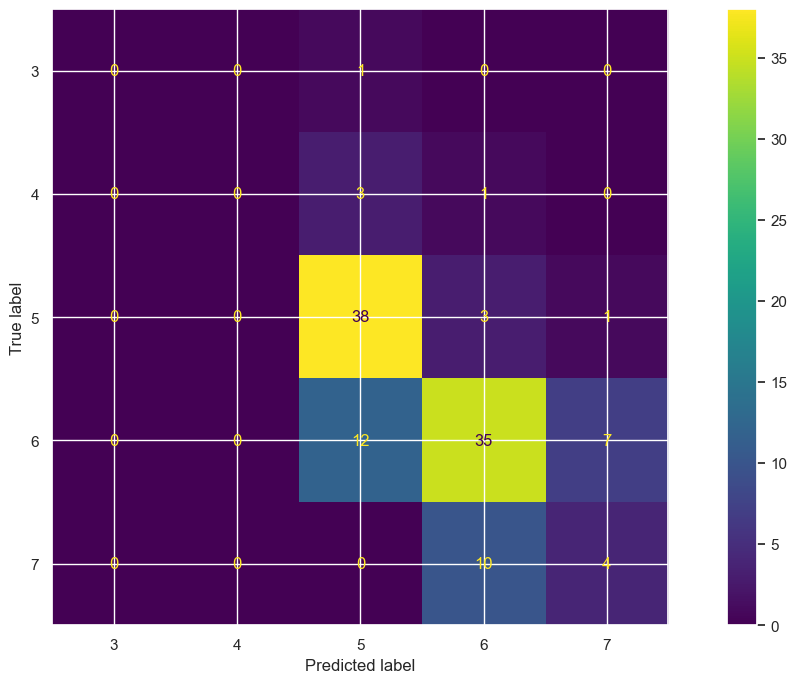

In [31]:
data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = logistical_regression(x_train, x_test, y_train, y_test)

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()


## Naive-Bayes
Naive-Bayes is a linear classifier that uses Bayes Theorem. It calculates the probability of an output given certain features, and requires that these features are conditionally independent from each other. In this project, we will be using GaussianNB as we won't need to discretize our features to use the model. 

In [32]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(X_train, X_test, y_train, y_test, smoothing=1e-9):
    # fitting model using our training data and the Gaussian Classifier
    model = GaussianNB(var_smoothing=smoothing).fit(X_train, y_train)
    
    # Make prediction from model
    y_pred = model.predict(X_test)

    # calcualte accuracy and f1
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")

    # calculating micro and macro precision/recall
    micro_precision = precision_score(y_test, y_pred, average="micro", zero_division=0)
    micro_recall = recall_score(y_test, y_pred, average="micro", zero_division=0)

    # calculating macro precision/recall 
    macro_precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
    macro_recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
    
    evaluation = {'accuracy': accuracy, 'f1': f1, 'macro_p': macro_precision, 'macro_r':macro_recall, 'micro_p':micro_precision, 'micro_r': micro_recall}
    return model, y_pred, evaluation

Accuracy: 0.5391304347826087
F1 Score: 0.5280600758861628
Micro Precision: 0.5391304347826087
Micro Recall: 0.5391304347826087
Macro Precision: 0.3034509350298824
Macro Recall: 0.29431216931216936


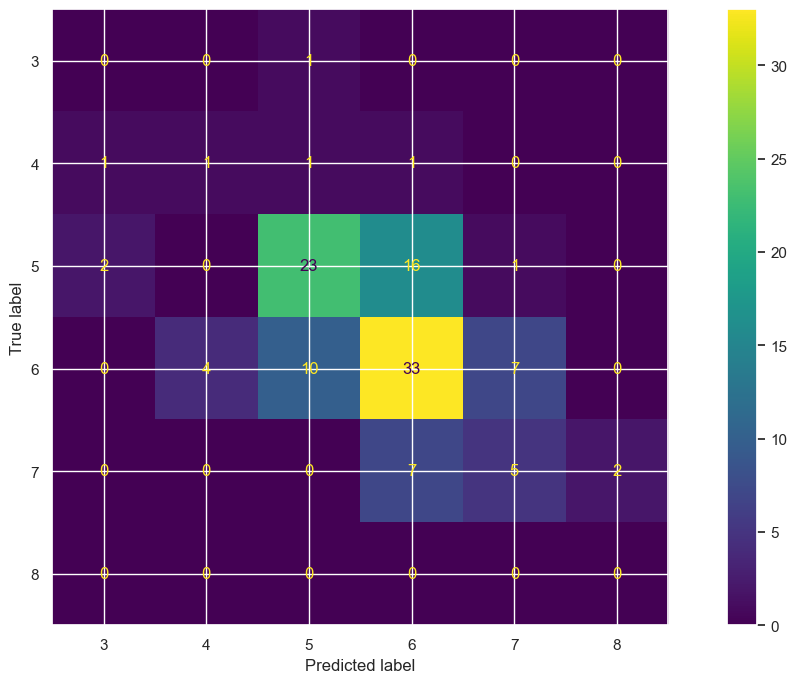

In [33]:
data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = naive_bayes(x_train, x_test, y_train, y_test)

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

# 6. Modifying Parameters

## Logistic Regression

We are modifing Tolerance and Solver used.

Accuracy: 0.5565217391304348
F1 Score: 0.6178395338413268
Micro Precision: 0.5565217391304348
Micro Recall: 0.5565217391304348
Macro Precision: 0.2264857881136951
Macro Recall: 0.27724867724867724


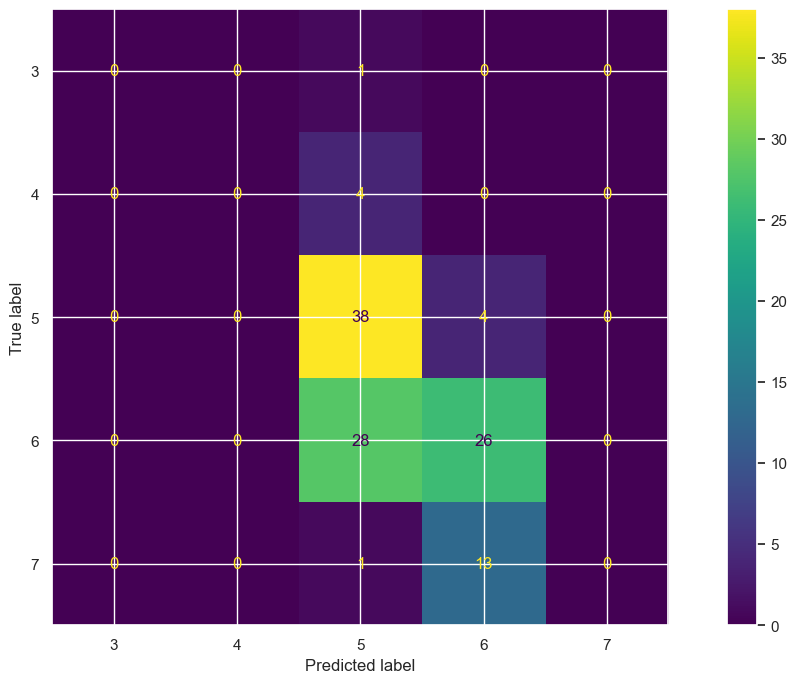

In [34]:
# Modifying Tolerance

data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = logistical_regression(x_train, x_test, y_train, y_test, C=1e-3)

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

Accuracy: 0.6
F1 Score: 0.6389565217391304
Micro Precision: 0.6
Micro Recall: 0.6
Macro Precision: 0.3133885438233264
Macro Recall: 0.31693121693121695


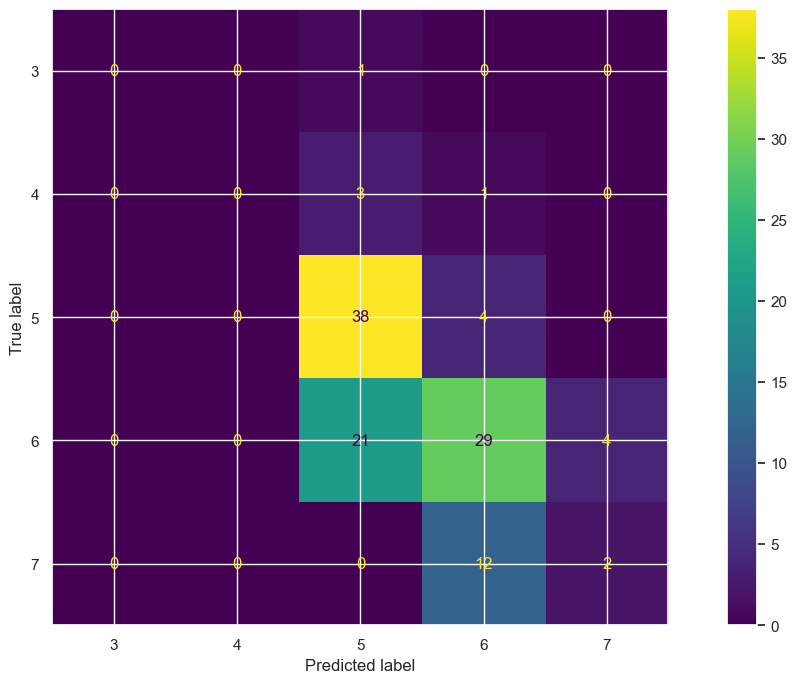

In [35]:
# Modifying Solver

data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = logistical_regression(x_train, x_test, y_train, y_test, solver='liblinear')

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()# Code Cell for second log.reg. call

## Naive Bayes

We are modifying smoothing.

Accuracy: 0.4434782608695652
F1 Score: 0.4841545893719808
Micro Precision: 0.4434782608695652
Micro Recall: 0.4434782608695652
Macro Precision: 0.2280246913580247
Macro Recall: 0.21322751322751327


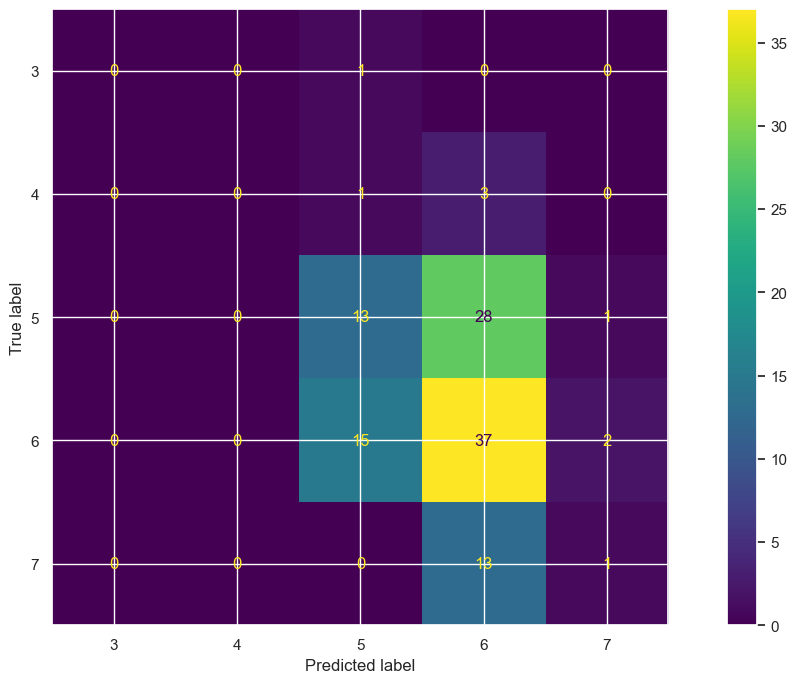

In [36]:
# Increasing smoothing

data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = naive_bayes(x_train, x_test, y_train, y_test, smoothing=1e-3)

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

Accuracy: 0.5304347826086957
F1 Score: 0.5194653333783769
Micro Precision: 0.5304347826086957
Micro Recall: 0.5304347826086957
Macro Precision: 0.2991554741554741
Macro Recall: 0.2912257495590829


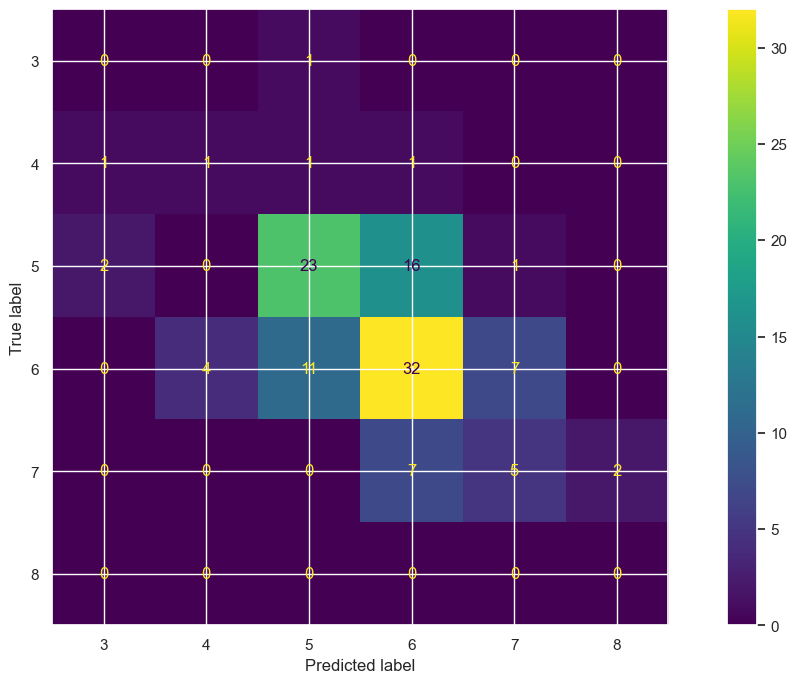

In [37]:
# Decreasing Smoothing

data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

# creating a our training and testing cohorts 
x_train, x_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size = 0.1, 
    random_state = 125
)

model, y_pred, results = naive_bayes(x_train, x_test, y_train, y_test, smoothing=1e-100)

# print accuracy and f1
print("Accuracy:", results['accuracy'])
print("F1 Score:", results['f1'])

# Print micro-averaged precision and recall
print("Micro Precision:", results['micro_p'])
print("Micro Recall:", results['micro_r'])

# Print macro-averaged precision and recall
print("Macro Precision:", results['macro_p'])
print("Macro Recall:", results['macro_r'])

# create confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# create labels from included classes between test set and predicted set
labels = list(set(np.unique(y_test)).union(np.unique(y_pred)))
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
disp.plot()

# 7. Evaluating our Models

## 4-fold cross validation and precision/recall evaluation
We will use 4-fold cross validation to evaluate our models. 4-fold cross splits our dataset into different training and test sets 4 times. We then take these sets, train the model on each of them and evaluate against their respective test set. By taking the overall average evaluation scores, we can confidently assess the model and ensure that our training was not biased due to how we split the data.

In [38]:
# Code Block for 4-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 4)
results_LR = []
results_LR_tol = []
results_LR_solver = []

results_NB = []
results_NB_smoothing_decrease = []
results_NB_smoothing_increase = []

data = dataset.drop(['quality', 'Id'], axis=1)
target = dataset['quality']

for train_index, test_index in kf.split(dataset):
    x_train, x_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    
    # Call the naive_bayes function and store results in different variables
    _, _, resultsNB = naive_bayes(x_train, x_test, y_train, y_test)
    _, _, reusltsNBSmoothingDecrease = naive_bayes(x_train, x_test, y_train, y_test, smoothing=1e-100)
    _, _, resultsNBSmoothingIncrease = naive_bayes(x_train, x_test, y_train, y_test, smoothing=1e-3)

    _, _, resultsLR = logistical_regression(x_train, x_test, y_train, y_test)
    _, _, resultsLRTol = logistical_regression(x_train, x_test, y_train, y_test, C=1e-4)
    _, _, resultsLRSolver = logistical_regression(x_train, x_test, y_train, y_test, solver='liblinear')


    results_LR.append(resultsLR)
    results_LR_tol.append(resultsLRTol)
    results_LR_solver.append(resultsLRSolver)
    
    results_NB.append(resultsNB)
    results_NB_smoothing_decrease.append(reusltsNBSmoothingDecrease)
    results_NB_smoothing_increase.append(resultsNBSmoothingIncrease)

# Calculate averages on each value
avg_results_LR = {metric: sum(result[metric] for result in results_LR) / len(results_LR) for metric in results_LR[0]}
avg_results_LR_tol = {metric: sum(result[metric] for result in results_LR_tol) / len(results_LR_tol) for metric in results_LR_tol[0]}
avg_results_LR_solver = {metric: sum(result[metric] for result in results_LR_solver) / len(results_LR_solver) for metric in results_LR_solver[0]}

avg_results_NB = {metric: sum(result[metric] for result in results_NB) / len(results_NB) for metric in results_NB[0]}
avg_results_NB_smoothing_decrease = {metric: sum(result[metric] for result in results_NB_smoothing_decrease) / len(results_NB_smoothing_decrease) for metric in results_NB_smoothing_decrease[0]}
avg_results_NB_smoothing_increase = {metric: sum(result[metric] for result in results_NB_smoothing_increase) / len(results_NB_smoothing_increase) for metric in results_NB_smoothing_increase[0]}

print("Average Results for Logistic Regression With Default Params:")
for metric, value in avg_results_LR.items():
    print(f"{metric}: {value:.4f}")
    
print("\nAverage Results for Logistic Regression With Tolerance at 1e-3:")
for metric, value in avg_results_LR_tol.items():
    print(f"{metric}: {value:.4f}")

print("\nAverage Results for Logistic Regression With Liblinear Solver:")
for metric, value in avg_results_LR_solver.items():
    print(f"{metric}: {value:.4f}")

print("\nAverage Results for Naive Bayes With Default Params:")
for metric, value in avg_results_NB.items():
    print(f"{metric}: {value:.4f}")
    
print("\nAverage Results for Naive Bayes With Smoothing Set To 1e-100:")
for metric, value in avg_results_NB_smoothing_decrease.items():
    print(f"{metric}: {value:.4f}")
    
print("\nAverage Results for Naive Bayes With Smoothing Set To 1e-3:")
for metric, value in avg_results_NB_smoothing_increase.items():
    print(f"{metric}: {value:.4f}")


Average Results for Logistic Regression With Default Params:
accuracy: 0.5906
f1: 0.6225
macro_p: 0.3142
macro_r: 0.2916
micro_p: 0.5906
micro_r: 0.5906

Average Results for Logistic Regression With Tolerance at 1e-3:
accuracy: 0.4462
f1: 0.5463
macro_p: 0.1652
macro_r: 0.2101
micro_p: 0.4462
micro_r: 0.4462

Average Results for Logistic Regression With Liblinear Solver:
accuracy: 0.5915
f1: 0.6365
macro_p: 0.2619
macro_r: 0.2761
micro_p: 0.5915
micro_r: 0.5915

Average Results for Naive Bayes With Default Params:
accuracy: 0.5285
f1: 0.5263
macro_p: 0.2858
macro_r: 0.3120
micro_p: 0.5285
micro_r: 0.5285

Average Results for Naive Bayes With Smoothing Set To 1e-100:
accuracy: 0.5215
f1: 0.5202
macro_p: 0.2819
macro_r: 0.3093
micro_p: 0.5215
micro_r: 0.5215

Average Results for Naive Bayes With Smoothing Set To 1e-3:
accuracy: 0.4987
f1: 0.5403
macro_p: 0.2321
macro_r: 0.2309
micro_p: 0.4987
micro_r: 0.4987


# 8. Analysis
From the above evaluation, it can be seen that Logistic Regression is slightly better at classification than Naive Bayes for this problem. This may be due to overfitting - as previously mentioned, the quality classifier in the dataset trends towards 5-6. Therefore the model would predict correctly on our dataset but may have problems classifying outliers. Increasing tolerance for logistic regression reduces accuracy as expected - and is reflected in the macro/micro precision and recall. Changing to the `liblinear` solver *slightly* increases accuracy, which is expected as liblinear is used for relatively small datasets and is more accurate.

For Naive Bayes, we can see that decreasing the smoothing does not change the micro/macro precision and recall by alot - only by a couple of percent. In fact, it slightly decreases compared to the default smoothing value of `1e-9`. This makes sense, as decreasing the smoothing allows for more weight to be placed upon samples that are closer to the distribution mean. This means that the model may overfit to the mean, leading to some outliers now being incorrectly predicted. On the other hand, increasing the smoothing drastically reduces macro/micro p and r. Increasing the smoothing value allows for less weight to be placed upon samples closer to the distribution mean, meaning that the model places more importance on outliers that can impact predictions. 

It can be noted that macro p and r are low. This can be attributed to the unbalanced nature of our classes, especially quality. There are an abundance of 5-6 quality datapoints, meaning that other quality classes are underrepresented, meaning that they may not be predicted correctly, bringing down the macro p and r. 

# 9. References:
1. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
2. https://www.datacamp.com/workspace/templates/template-python-resample-a-dataset
3. https://www.educative.io/answers/what-are-classification-problems
4. https://medium.com/@brijesh_soni/topic-5-encodings-
5. https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c